<div class="alert alert-info">
    <img src="img/logo.png" style="width:150px;height:150px;" align="right">
    <h1 align="center">Deep Learning with Pytorch</h1> 
    <h3 align="center"> lecture 2(Summer 2021)</h3>
    <h5 align="center">Fateme Hafezian zade [DL2021](https://fatemehafezi.gnomio.com)</h5>
    
</div>

<h2>Table of Contents</h2>


<ul>
    <li><a href="#Regression_No">Regression without any module </a></li>
    <li><a href="#Regression_pytorch">Regression with torch module</a></li>
    
</ul>


<hr>


<img src="img/1.png" style="width:350px;height:300px;">

<img src="img/images.png" style="width:350px;height:300px;">

<h4 id="Makeup_Data">Make Some Data</h4>


In [1]:
# Import the library PyTorch

import torch

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [60]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

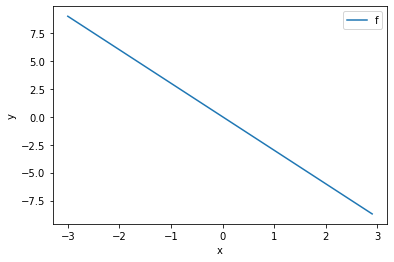

In [61]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [62]:
# Add some noise to f(X) and save it in Y

Y = f + 2 * torch.randn(X.size())

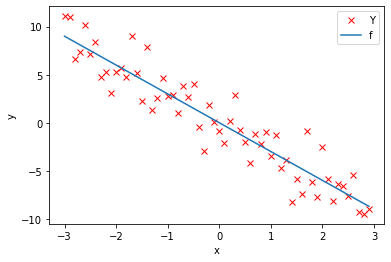

In [63]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Model_Cost">Regression without any module</h2>


In [7]:
# Create forward function for prediction

def forward(x):
    return w * x

In [8]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [9]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [10]:
w = torch.tensor(-10.0, requires_grad = True)

In [11]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<h4 id="Train">Train the Model</h4>


In [12]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        
        Yhat = forward(X)
        
        
        loss = criterion(Yhat,Y)
        
        
        gradient_plot(Yhat, w, loss.item(), epoch)
        
     
        LOSS.append(loss.item())
        
        
        loss.backward()
        
      
        w.data = w.data - lr * w.grad.data
        
   
        w.grad.data.zero_()

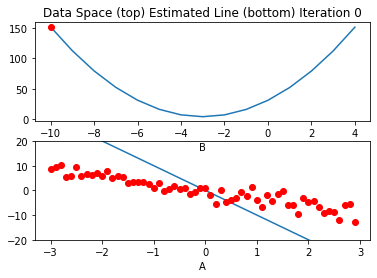

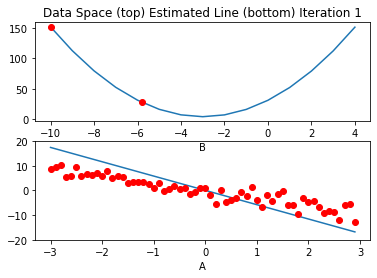

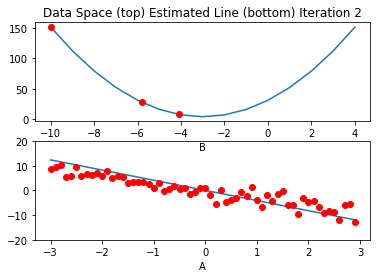

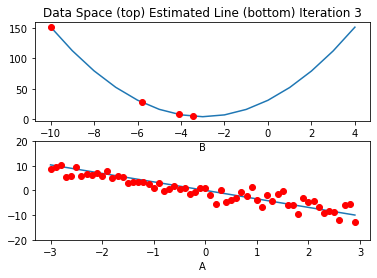

<Figure size 432x288 with 0 Axes>

In [13]:
# Give 4 iterations for training the model here.

train_model(4)

[151.40081787109375, 27.61089324951172, 7.837503433227539, 4.679033279418945]


Text(23.875, 0.5, 'Cost')

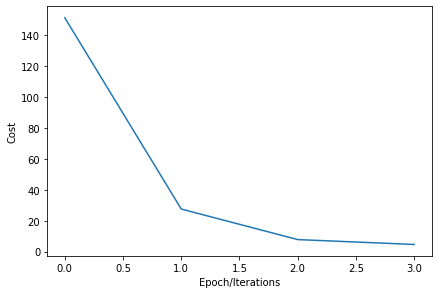

In [15]:
# Plot the loss for each iteration
print(LOSS)
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<h2 id="Model_Cost">Regression with pytorch module</h2>


In [93]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

# Add some noise to f(X) and save it in Y

Y = f + 2 * torch.randn(X.size())

In [94]:
# Build in cost function

criterion = nn.MSELoss()

In [95]:
# Create optimizer

model = nn.Linear(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [96]:
#model.state_dict()['linear.weight'][0] = -15
#model.state_dict()['linear.bias'][0] = -10

<h4 id="Train">Train the Model</h4>


In [97]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        
        yhat = model(X)
        loss = criterion(yhat, Y) 
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    return yhat    



In [98]:
w1= list(model.parameters())[0].item()
print(w1)

-0.1459568738937378


In [101]:

yhat= train_model_BGD(50)
loss=criterion(yhat,Y)

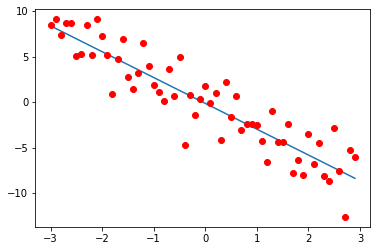

In [102]:

plt.plot(X.detach().numpy(),yhat.detach().numpy())
plt.plot(X.detach().numpy(),Y.detach().numpy(),'ro')


In [103]:

print(loss)


tensor(4.6085, grad_fn=<MseLossBackward>)


In [ ]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat